In [94]:
from maskmm.ipstartup import *
import os
import glob
import random
import skimage.io
from skimage.io import imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

from maskmm.coco.config import Config
from maskmm.models.maskrcnn import MaskRCNN
from maskmm.nuke.dataset import Dataset
from maskmm.utils import visualize

import torch
from os.path import join

ROOT_DIR = "/home/ubuntu/maskmm"
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "data/models/mask_rcnn_coco.pth")
DATA = join(expanduser("~"), "data", "nuke") 

[root:INFO]:starting (cellevents.py:36, time=21:51)


time: 2.73 ms


In [95]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    a
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

[root:INFO]:starting (cellevents.py:36, time=21:51)


time: 2.36 ms


In [97]:
dataset_train = Dataset()
dataset_train.load_nuke(DATA, "stage1_train")
dataset_train.prepare()

[root:INFO]:starting (cellevents.py:36, time=21:51)


time: 38.9 ms


In [90]:
# Masks
from tqdm import tqdm_notebook as tqdm 
masks = []
for i in tqdm(list(dataset_train.image_ids)):
    mask, _ = dataset_train.load_mask(i)
    mask = mask.transpose(2,0,1)
    shapes = [m.shape for m in mask]
    masks.extend(shapes)
s = pd.Series(masks)
s.value_counts()

[root:INFO]:starting (cellevents.py:36, time=21:12)


(520, 696)      9414
(256, 256)      8781
(256, 320)      4496
(360, 360)      2020
(1024, 1024)    1345
(603, 1272)     1110
(260, 347)       408
(512, 640)       357
(1040, 1388)      14
dtype: int64

time: 48.8 s


#  Bounding boxes

In [91]:
from maskmm.utils import box_utils
from tqdm import tqdm_notebook as tqdm
nmasks = []
heights = []
widths = []
ratios = []
for image_id in tqdm(dataset_train.image_ids):
    masks = dataset_train.load_mask(image_id)[0]
    bboxes = box_utils.extract_bboxes(masks)
    nmasks.append(len(bboxes))
    for bbox in bboxes:
        y1, x1, y2, x2 = bbox
        height = y2-y1
        width = x2-x1
        ratio = height/width
        heights.append(height)
        widths.append(width)
        ratios.append(ratio)
sum(nmasks)

[root:INFO]:starting (cellevents.py:36, time=21:13)


27945

time: 52.4 s


[root:INFO]:starting (cellevents.py:36, time=20:36)


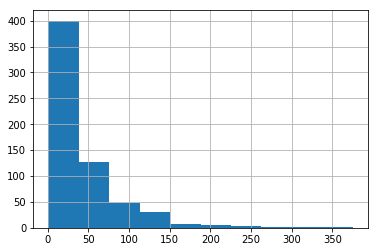

time: 615 ms


In [25]:
n = pd.Series(nmasks)
n.hist()

[root:INFO]:starting (cellevents.py:36, time=20:36)


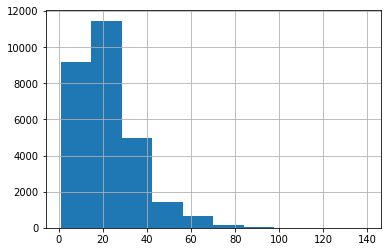

time: 335 ms


In [26]:
h = pd.Series(heights)
h.hist()

[root:INFO]:starting (cellevents.py:36, time=20:36)


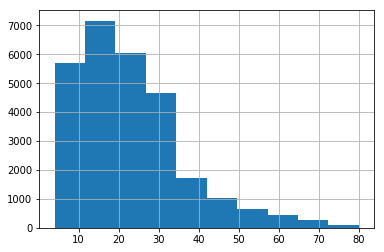

time: 342 ms


In [27]:
w = pd.Series(widths)
w[w.between(4, 80)].hist()

In [28]:
print(n.mean(), n.std())
print(h.mean(), h.std())
print(w.mean(), w.std())

[root:INFO]:starting (cellevents.py:36, time=20:36)


44.4984076433121 48.532548778333094
22.640329218106995 13.617260602691513
23.003041689032028 13.832471668290754
time: 252 ms


[root:INFO]:starting (cellevents.py:36, time=20:36)


0.03864734299516908


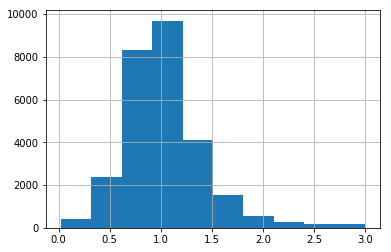

time: 217 ms


In [29]:
r = pd.Series(ratios)
print(len(r[r>2])/len(r))
r[r.between(0, 3)].hist()

[root:INFO]:starting (cellevents.py:36, time=20:36)


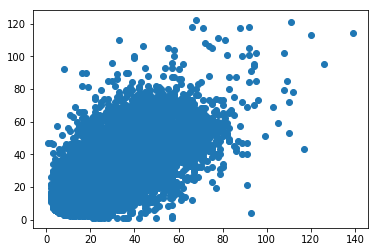

time: 713 ms


In [30]:
plt.scatter(heights, widths)

# Images

In [32]:
# mean image
images = [dataset_train.load_image(id) for id in dataset_train.image_ids]
imagesr = [resize(i, (256,256)) for i in images]
np.mean(np.mean(imagesr, axis=(0,1)), axis=0)

[root:INFO]:starting (cellevents.py:36, time=20:37)


97.38800342827085

time: 6.19 s


[root:INFO]:starting (cellevents.py:36, time=21:15)
/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_base.py:1324: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


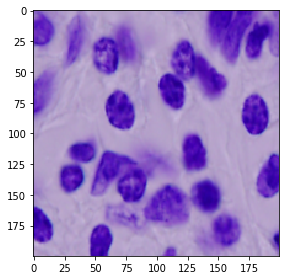

time: 363 ms


In [92]:
image = dataset_train.load_image(36)
masks, classes = dataset_train.load_mask(36)
imshow(resize(image, (200,200)))

[root:INFO]:starting (cellevents.py:36, time=21:16)


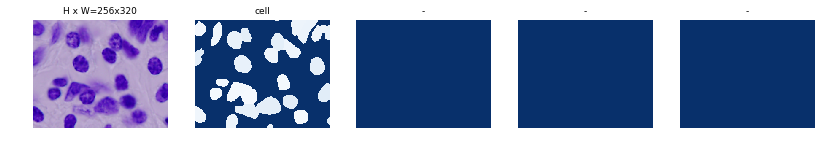

time: 465 ms


In [93]:
visualize.display_top_masks(image, masks, classes, dataset_train.class_names)